In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
df = pd.read_csv('online_shoppers_intention.csv')

In [46]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
847,0,0.0,0,0.0,7,182.000000,0.028571,0.071429,0.000000,0.0,Mar,3,2,1,13,Returning_Visitor,True,False
9142,8,152.0,0,0.0,4,72.500000,0.000000,0.009524,0.000000,0.0,Nov,2,2,1,8,New_Visitor,False,False
12267,0,0.0,0,0.0,5,277.500000,0.000000,0.040000,42.030441,0.0,Nov,2,2,3,2,Returning_Visitor,False,True
9023,0,0.0,0,0.0,34,1401.458333,0.000000,0.023529,0.000000,0.0,Nov,2,2,9,11,New_Visitor,False,True
7866,2,33.2,0,0.0,9,162.233333,0.000000,0.018182,0.000000,0.0,Sep,2,2,1,5,Returning_Visitor,False,False


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [48]:
nums = [
        'Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
]
cats = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType','VisitorType', 'Weekend', 'Revenue']

# Cleaning Data

## Handle Missing Value

In [49]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Handle Duplicated Data

In [50]:
df.duplicated().sum()

125

In [51]:
df = df.drop_duplicates()
print(f'Number of duplicated data = {df.duplicated().sum()}')

Number of duplicated data = 0


## Handle Outliers

In [52]:
outlier = df.select_dtypes(include=['float64'])
outlier = outlier.drop('SpecialDay', axis = 1 )

In [53]:
def iqr_calc(df):
    Q1 = df.quantile(0.25) # Q1 range
    Q3 = df.quantile(0.75) # Q3 range
    IQR = Q3 - Q1 # IQR range
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

In [54]:
outlier.apply(iqr_calc)

Administrative_Duration    1149
Informational_Duration     2405
ProductRelated_Duration     951
BounceRates                1428
ExitRates                  1325
PageValues                 2730
dtype: int64

## Feature Transformation

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for i in nums:
    df[f'{i}_std'] = StandardScaler().fit_transform(df[i].values.reshape(len(df), 1))
       
    df[f'{i}_norm'] = StandardScaler().fit_transform(df[i].values.reshape(len(df), 1))

In [56]:
df[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


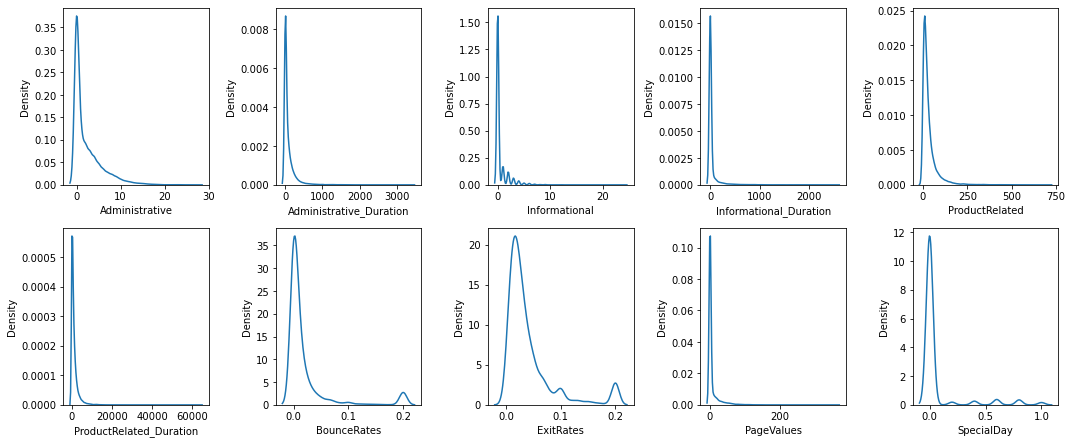

In [57]:
features = nums
plt.figure(figsize=(15,15))
for i in range (0, len(nums)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Variabel numerikal memiliki data yang tidak normal sehingga dilakukan proses transformasi rescale untuk normalisasi

<AxesSubplot:xlabel='BounceRates', ylabel='Density'>

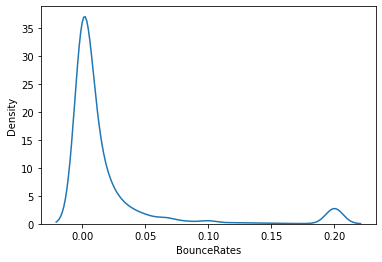

In [58]:
# BounceRates (nilai asli)
sns.kdeplot(df['BounceRates'])

C:\Users\L E N O V O\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='BounceRates', ylabel='Density'>

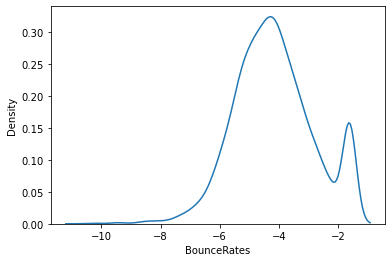

In [59]:
# distribusi BounceRates (setelah log transformation)
sns.kdeplot(np.log(df['BounceRates']))
# lebih mendekati distribusi normal!

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [61]:
# berat dan tinggi kita re-scale
df['BounceRates_norm'] = MinMaxScaler().fit_transform(df['BounceRates'].values.reshape(len(df), 1))

# umur dan log gaji kita standarisasi (karena distribusi datanya sudah mendekati normal)
df['BounceRates_std'] = StandardScaler().fit_transform(df['BounceRates'].values.reshape(len(df), 1))

In [62]:
df[['BounceRates','BounceRates_std','BounceRates_norm']].describe()

,BounceRates,BounceRates_std,BounceRates_norm
count,12205.000000,1.220500e+04,12205.000000
mean,0.020370,-2.538831e-15,0.101852
std,0.045255,1.000041e+00,0.226277
min,0.000000,-4.501371e-01,0.000000
25%,0.000000,-4.501371e-01,0.000000
50%,0.002899,-3.860858e-01,0.014493
75%,0.016667,-8.184213e-02,0.083333
max,0.200000,3.969402e+00,1.000000


<AxesSubplot:xlabel='ExitRates', ylabel='Density'>

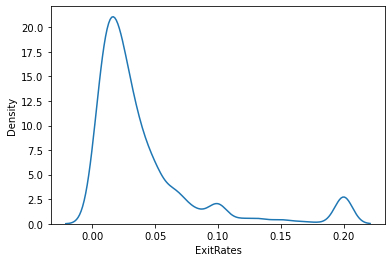

In [63]:
sns.kdeplot(df['ExitRates'])

C:\Users\L E N O V O\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='ExitRates', ylabel='Density'>

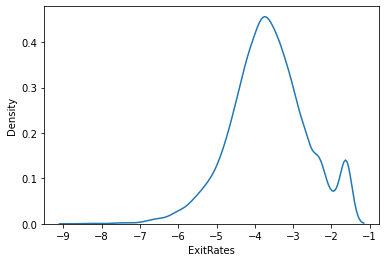

In [64]:
sns.kdeplot(np.log(df['ExitRates']))

In [65]:
# berat dan tinggi kita re-scale
df['ExitRates_norm'] = MinMaxScaler().fit_transform(df['ExitRates'].values.reshape(len(df), 1))

# umur dan log gaji kita standarisasi (karena distribusi datanya sudah mendekati normal)
df['ExitRates_std'] = StandardScaler().fit_transform(df['ExitRates'].values.reshape(len(df), 1))

In [66]:
df[['ExitRates','ExitRates_std','ExitRates_norm']].describe()

,ExitRates,ExitRates_std,ExitRates_norm
count,12205.000000,1.220500e+04,12205.000000
mean,0.041466,3.766299e-16,0.207328
std,0.046163,1.000041e+00,0.230814
min,0.000000,-8.982857e-01,0.000000
25%,0.014231,-5.899945e-01,0.071155
50%,0.025000,-3.567007e-01,0.125000
75%,0.048529,1.530263e-01,0.242647
max,0.200000,3.434394e+00,1.000000


<AxesSubplot:xlabel='Administrative_Duration', ylabel='Density'>

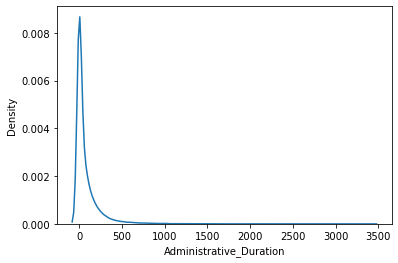

In [67]:
sns.kdeplot(df['Administrative_Duration'])

C:\Users\L E N O V O\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Administrative_Duration', ylabel='Density'>

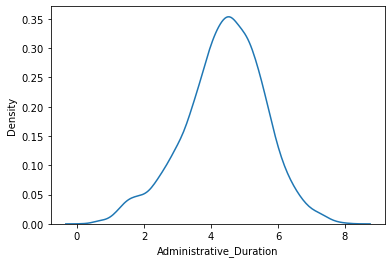

In [68]:
sns.kdeplot(np.log(df['Administrative_Duration']))

In [69]:
df['Administrative_Duration_norm'] = MinMaxScaler().fit_transform(df['Administrative_Duration'].values.reshape
                                                                  (len(df), 1))


df['Administrative_Duration_std'] = StandardScaler().fit_transform(df['Administrative_Duration'].values.reshape
                                                                   (len(df), 1))

In [70]:
df[['Administrative_Duration','Administrative_Duration_std','Administrative_Duration_norm']].describe()

,Administrative_Duration,Administrative_Duration_std,Administrative_Duration_norm
count,12205.000000,1.220500e+04,12205.000000
mean,81.646331,-1.978380e-15,0.024022
std,177.491845,1.000041e+00,0.052223
min,0.000000,-4.600193e-01,0.000000
25%,0.000000,-4.600193e-01,0.000000
50%,9.000000,-4.093107e-01,0.002648
75%,94.700000,7.354819e-02,0.027863
max,3398.750000,1.868953e+01,1.000000


<AxesSubplot:xlabel='Informational_Duration', ylabel='Density'>

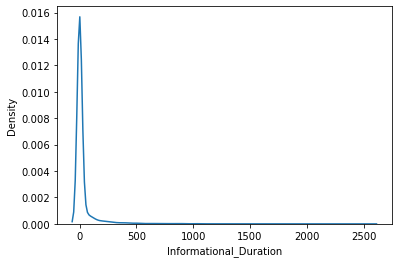

In [71]:
sns.kdeplot(df['Informational_Duration'])

C:\Users\L E N O V O\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Informational_Duration', ylabel='Density'>

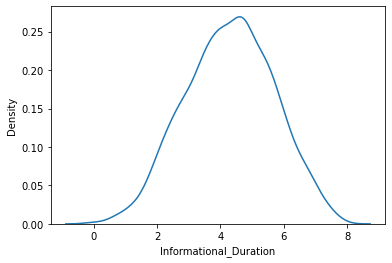

In [72]:
sns.kdeplot(np.log(df['Informational_Duration']))

In [73]:
df['Informational_Duration_norm'] = MinMaxScaler().fit_transform(df['Informational_Duration'].values.reshape
                                                                 (len(df), 1))


df['Informational_Duration_std'] = StandardScaler().fit_transform(df['Informational_Duration'].values.reshape
                                                                  (len(df), 1))

In [74]:
df[['Informational_Duration','Informational_Duration_std','Informational_Duration_norm']].describe()

,Informational_Duration,Informational_Duration_std,Informational_Duration_norm
count,12205.000000,1.220500e+04,12205.000000
mean,34.825454,1.815444e-15,0.013660
std,141.424807,1.000041e+00,0.055474
min,0.000000,-2.462572e-01,0.000000
25%,0.000000,-2.462572e-01,0.000000
50%,0.000000,-2.462572e-01,0.000000
75%,0.000000,-2.462572e-01,0.000000
max,2549.375000,1.778084e+01,1.000000


<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Density'>

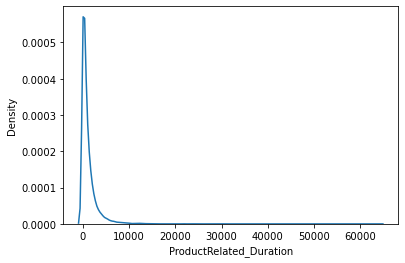

In [75]:
sns.kdeplot(df['ProductRelated_Duration'])

C:\Users\L E N O V O\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Density'>

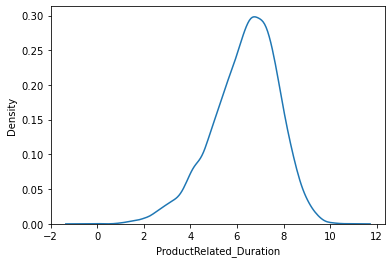

In [76]:
sns.kdeplot(np.log(df['ProductRelated_Duration']))

In [77]:
df['ProductRelated_Duration_norm'] = MinMaxScaler().fit_transform(df['ProductRelated_Duration'].values.reshape
                                                                  (len(df), 1))


df['ProductRelated_Duration_std'] = StandardScaler().fit_transform(df['ProductRelated_Duration'].values.reshape
                                                                   (len(df), 1))

In [78]:
df[['ProductRelated_Duration','ProductRelated_Duration_std','ProductRelated_Duration_norm']].describe()

,ProductRelated_Duration,ProductRelated_Duration_std,ProductRelated_Duration_norm
count,12205.000000,1.220500e+04,12205.000000
mean,1206.982457,-4.081855e-16,0.018867
std,1919.601400,1.000041e+00,0.030006
min,0.000000,-6.287930e-01,0.000000
25%,193.000000,-5.282472e-01,0.003017
50%,608.942857,-3.115564e-01,0.009519
75%,1477.154762,1.407497e-01,0.023090
max,63973.522230,3.269903e+01,1.000000


## Feature Encoding

In [79]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

Value Other dimasukkan ke dalam Returning_Visitor

In [80]:
df['VisitorType'].replace('Other', 'Returning_Visitor', inplace=True)

In [81]:
encoded = pd.get_dummies(df, prefix='VisitorType')
encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Feb,VisitorType_Jul,VisitorType_June,VisitorType_Mar,VisitorType_May,VisitorType_Nov,VisitorType_Oct,VisitorType_Sep,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1


In [82]:
encoded = pd.get_dummies(df, prefix='Weekend')
encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend_Feb,Weekend_Jul,Weekend_June,Weekend_Mar,Weekend_May,Weekend_Nov,Weekend_Oct,Weekend_Sep,Weekend_New_Visitor,Weekend_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1


In [83]:
encoded = pd.get_dummies(df, prefix='Revenue')
encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Revenue_Feb,Revenue_Jul,Revenue_June,Revenue_Mar,Revenue_May,Revenue_Nov,Revenue_Oct,Revenue_Sep,Revenue_New_Visitor,Revenue_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1


## Handle Class Imbalance

In [85]:
df['revenue_class'] = df['Revenue'] > 0.8
df['revenue_class'].value_counts()

False    10297
True      1908
Name: revenue_class, dtype: int64

In [86]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and 
         col not in ['Revenue', 'revenue_class']]]
y = df['revenue_class'].values
print(X.shape)
print(y.shape)

(12205, 35)
(12205,)


In [87]:
!pip install -U imbalanced-learn --user

In [88]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

In [89]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    10297
True      1908
dtype: int64


OVERSAMPLING
False    10297
True     10297
dtype: int64


SMOTE
False    10297
True     10297
dtype: int64


# Feature Engineering

## Feature Selection

In [102]:
df_new = df.drop(columns=['Month','VisitorType','Weekend','Administrative_std','Administrative_norm',
                          'Administrative_Duration_std','Administrative_Duration_norm','Informational_std',
                          'Informational_norm','Informational_Duration_std','Informational_Duration_std',
                          'ProductRelated_std','ProductRelated_norm','ProductRelated_Duration_std',
                          'ProductRelated_Duration_norm','BounceRates_std','BounceRates_norm','ExitRates_std',
                          'ExitRates_norm','PageValues_std','PageValues_norm','SpecialDay_std','SpecialDay_norm',
                          'revenue_class'])

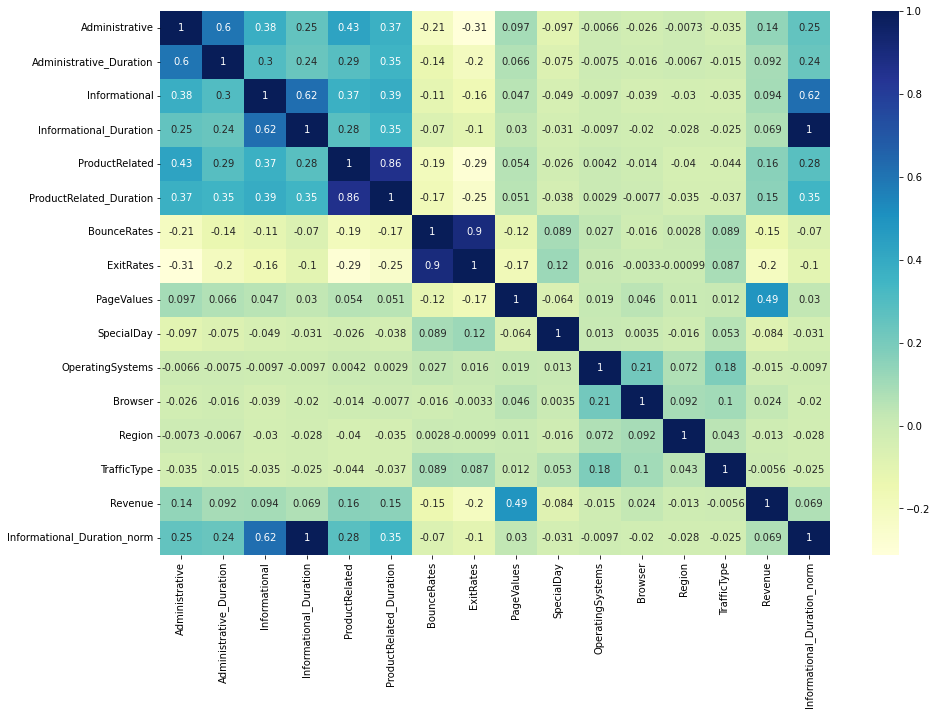

In [103]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(), cmap='YlGnBu', annot=True)
plt.show()

Fitur yang redundant:
* Administrative & Administrative_Duration
* Informational & Informational_Duration
* ProductRelated & ProductRelated_Duration
* BounceRates & ExitRates

## Feature Extraction

In [104]:
dfg = df.groupby(['Month'])['ExitRates'].sum().sort_values(ascending=False)
print(dfg)

Month
May     157.329829
Nov     111.330192
Mar      75.651385
Dec      67.129893
Jul      19.582716
Aug      16.335648
June     16.173806
Oct      15.927259
Sep      13.583583
Feb      13.043285
Name: ExitRates, dtype: float64


In [105]:
dfg = df.groupby(['Month'])['BounceRates'].sum().sort_values(ascending=False)
print(dfg)

Month
May     83.379267
Nov     54.537874
Mar     32.034902
Dec     30.597567
Jul     10.660237
June     9.509304
Feb      8.051934
Aug      7.885283
Oct      6.505344
Sep      5.458009
Name: BounceRates, dtype: float64


Pada bulan May terdapat Mother's Day, bulan November Thanksgiving Day, Dan bulan maret terdapat Bulan Ramadhan. Ini yang membuat potensi daripada penjualan di online shop lebih dari normal pada bulan tertentu

In [106]:
df['GroupBounceRates']= np.where(df['BounceRates'] <0.1, 'Low',(np.where((df['BounceRates'] <0.15 ) 
                                                                         & (df['BounceRates'] > 0.1), 
                                                                         'Medium', 'High')))


df.groupby('GroupBounceRates')[['ExitRates']].count().reset_index()

,GroupBounceRates,ExitRates
0,High,709
1,Low,11416
2,Medium,80


In [107]:
mapping = {'Feb' : 2,'Mar' : 3,'May' : 5,'June' : 6,'Jul' : 7,'Aug' : 8,'Sep' : 9,'Oct' : 10,'Nov' : 11,'Dec' : 12}

df['Month'] = df['Month'].map(mapping)

In [108]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,BounceRates_std,BounceRates_norm,ExitRates_std,ExitRates_norm,PageValues_std,PageValues_norm,SpecialDay_std,SpecialDay_norm,revenue_class,GroupBounceRates
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,3.969402,1.000000,3.434394,1.000000,-0.318962,-0.318962,-0.310240,-0.310240,False,High
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,-0.450137,0.000000,1.268054,0.500000,-0.318962,-0.318962,-0.310240,-0.310240,False,Low
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,3.969402,1.000000,3.434394,1.000000,-0.318962,-0.318962,-0.310240,-0.310240,False,High
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0.654748,0.250000,2.134590,0.700000,-0.318962,-0.318962,-0.310240,-0.310240,False,Low
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,-0.008183,0.100000,0.184884,0.250000,-0.318962,-0.318962,-0.310240,-0.310240,False,Low
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,-0.101226,0.078947,-0.366202,0.122807,-0.318962,-0.318962,-0.310240,-0.310240,False,Low
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,3.969402,1.000000,3.434394,1.000000,-0.318962,-0.318962,1.693186,1.693186,False,High
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,3.969402,1.000000,3.434394,1.000000,-0.318962,-0.318962,-0.310240,-0.310240,False,High
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,-0.450137,0.000000,1.268054,0.500000,-0.318962,-0.318962,3.696611,3.696611,False,Low
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,-0.450137,0.000000,-0.416877,0.111111,-0.318962,-0.318962,1.693186,1.693186,False,Low


## Ide Fitur Tambahan

#### Visit (jumlah kunjungan user ke website)
Apabila user seringkali atau lebih dari satu kali mengunjungi website, ada kemungkinan user tertarik untuk bertransaksi di e-commerce ini.

#### Wishlist (jumlah produk yang mereka harapkan dibeli dikemudian hari)
Whislist yang dimiliki user cenderung mempengaruhi keputusan dalam melakukan transaksi.

#### ClickAd (jumlah user menekan iklan promosi produk)
User yang menekan iklan promosi produk pada homepage ada ketertarikan terhadap produk yang diiklankan

#### ClikAd_duration (durasi user membaca deskripsi promosi produk pada iklan)
Lamanya user membaca deskripsi promosi produk pada iklan cenderung ada ketertarikan pada produk yang diiklankan

#### Review (jumlah user melihat review pada suatu produk)
Seringkali banyak user yang hendak melakukan transkasi melihat terlebih dahulu ulasan pada produk yang akan dibeli

#### Review_duration (durasi user melihat review (ulasan) pada suatu produk)
Lamanya user melihat review (ulasan) untuk meyakinkan apakah user akan bertransaksi atau tidak